<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/Perceptr%C3%B3n-multicapa/Perceptr%C3%B3n_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Multicapa


El perceptron es de una de las estructuras más simples. Está basada en una neurona ligeramente diferente llamada unidad logica de umbral(TLU) o a veces llamada  unidad lineal de umbral(LTU). Las entradas y las salidas son numeros cada entrada a la conexión se asocia con un peso. Esta unidad computa una suma ponderada de sus entradas y luego aplica una función de activacion, en este caso una función de escalon, a esta suma. 
$$z = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} = \boldsymbol{X^{T}}\boldsymbol{w}$$
$$h_{\boldsymbol{w}}(\boldsymbol{X}) = step(\boldsymbol{X^{T}}\boldsymbol{w})$$

 La función escalón más utilizada es la función escalón de Heaviside. La función de signo es utilizada también algunas veces.



In [ ]:
def heaviside(z):
  if z>=0:
    out = 1
  else:
    out = 0
  return out

In [ ]:
def sign(z):
  if z<0:
    out = -1
  elif z>0:
    out = 1
  else:
    out = 0
  return out  

La función escalón de Heaviside no es diferenciable en x=0 y tiene gradiente igual a cero en cualquier otro lugar, lo que significa que el descenso del gradiente no podrá actualizar los parametros. Por esta razón, está función no se utiliza en una red neuronal profunda.

In [ ]:

class Perceptron(nn.Module):
  def __init__(self):
    super(Perceptron, self).__init__()
    self.fc = nn.Linear(1,1)
    self.relu = nn.ReLU() # Instead of Heaviside step fn

  def forward(self, x):
    output =  self.fc(x)
    output = self.relu(x)
    return output


In [ ]:
class Feedforward(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Feedforward, self).__init__
    self.input_size = input_size
    self.hidden_size = hidden_size
    sel.f1 = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.fc2 =nn.Linear(self.hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output) # Binary Classification
    return output

In [ ]:
#Create  artificial points
from sklearn.datasets import make_blobs
def blob_label(y, label, loc): 
  target = np.copy(y)
  for l in loc:
    target [y == l] = label
    return target
x_train, y_train = make_blobs(n_samples = 40, n_features=2, cluster_std = 1.5, shuffle = True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train,0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))

x_test, y_test = make_blobs(n_samples = 10, n_features=2, cluster_std = 1.5, shuffle = True)
x_test = torch.FloatTensor(x_train)
y_test = torch.FloatTensor(blob_label(y_train,0, [0]))
y_test = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))







In [ ]:
model = Feedforward(2, 10)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.paramters(), lr = 0.01)

Este tipo de unidad se puede utilizar para realizar tareas simples de clasificación binaria. Por ejemplo, se podría utilizar un perceptrón para clasificar perros y gatos(tambien añadiendo un termino bias $x_{0}$).

Un Perceptrón está simplemente compuesto de una capa  con unidades logicas de umbral(TLU´s) con cada TLU conectado a todas las entradas. Cuando todas las unidades o neuronas de una capa están conectadas a cada neurona o unidad anterior(es decir, sus neuronas o unidades de entrada) se denomina una capa densa o totalmente conectada.

# Funciones de activación

---

Las funciones de activación cumplen dos roles muy importantes:
- En las partes internas del modelo permite que la función de salida tenga un valor de derivada diferente en diferentes puntos, algo que no lo puede lograr una función lineal por definición.
- Permiten concentrar las salidas de la función lineal en un rango de valores especificado.


---



## ¿Cómo escoger la función de activación?
Primero discutamos acerca de las generalidades de las funciones de activación:
- No son lineales: La no linealidad permite a la red aproximar funciones más complejas
- Son diferenciables: Esto significad que los gradientes se pueden calcular a través de ellas. Puntos de descontinuidad como se pueden ver en la función ReLu y Hardtanh están bien.

Sin estás caracteristicas, una red o se volverá dificil de entrenar o se coonvierte en un modelo lineal. 
Lo siguiente es cierto para estas funciones:
- Tienen por lo menos un rango sensitivo, donde un cambio no trivial en la entrada resulta en un cambio no trivial en la salida, lo cual es necesario para el entrenamiento
- Muchas de ellas tienen un rango no sensitivo(o sasturado ), en el cual los cambios en la entrada reflejan un cambio muy pequeño o casi despreciable en la salida. 


---


Si tenemos en cuenta la propagación hacía atrás, podemos deducir que los errores se propagarán a través de la función de activación de manera más eficaz,si las entradas se encuentran en el rango de respuesta(sensitivo) y pasará lo contrario cuando estén en en rango saturado, debido a que el gradiente será cercano a cero. 


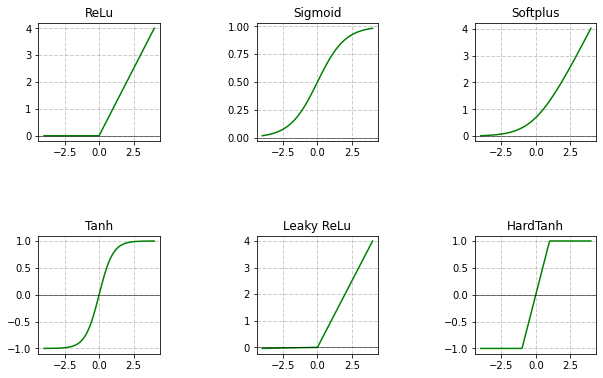

In [66]:
## Algunas funciones de activación utilizando PyTorch
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


x_axe = np.linspace(-4, 4, 200)
input = torch.from_numpy(x_axe)
output_relu = nn.ReLU()(input).numpy() # ReLU
output_softmax = nn.Softplus()(input).numpy() # Softplus
output_sigmoid = nn.Sigmoid()(input).numpy() # Sigmoid
output_leakyR = nn.LeakyReLU()(input).numpy() # Leaky ReLu
output_tanh = nn.Tanh()(input).numpy() # Tanh
output_hardtanh = nn.Hardtanh()(input).numpy() # HardTanh
outputs1 = {'ReLu': output_relu, 'Sigmoid': output_sigmoid, 'Softplus': output_softmax, 
            'Tanh': output_tanh, 'Leaky ReLu': output_leakyR, 'HardTanh': output_hardtanh}
i = 1
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for key in outputs1.keys():
  ax = fig.add_subplot(3, 3, i)
  ax.plot(x_axe,outputs1[key],"g-")
  ax.set_title(key)
  ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
  # Pintar los ejes pasando por (0,0)
  ax.axhline(0, color='black', linewidth=0.5)
  i+=1
plt.show()




Optimizadores
SGD
RMSPROP
Adam

In [ ]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

Cada constructor de un optimizador toma una lista de parametros como primer argumento. Todos los parametros que son pasados al optimizador son retenidos dentro de esta instancia de modo que este puede actualizar sus valores y acceder al atributo .grad. Cada optimizador expone dos metodos zero_grad y step. 
zero_grad pone en cero el atributo .grad de los parametros pasados al optimizador mediante su constructor.
step actualiza el valor de estos parametros de acuerdo al metodo de optimización escogido

In [64]:
from torchvision import datasets
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_path =   './data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [67]:
import torchvision
batch_size = 8
trainloader = torch.utils.data.DataLoader(cifar10, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(cifar10_val, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

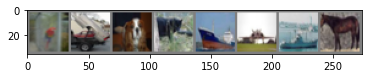

 bird truck   dog   cat  ship plane  ship horse


In [68]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Keras implementación


In [69]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.f1 = nn.Linear(32 * 32 * 3, 84)
    self.f2 = nn.Linear(84, 10)
    self.relu = torch.nn.ReLU()
    
  def forward(self, x):
    x = x.view(-1, 32*32*3)
    x = self.relu(self.f1(x))
    x = self.f2(x)
    return x
mlp = MLP()

In [70]:
import torch.optim as optim

In [71]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.01, momentum=0.9)

In [72]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.347
[1,  4000] loss: 2.383
[1,  6000] loss: 2.304
[2,  2000] loss: 2.245
[2,  4000] loss: 2.191
[2,  6000] loss: 2.158
[3,  2000] loss: 2.106
[3,  4000] loss: 2.127
[3,  6000] loss: 2.100
[4,  2000] loss: 2.051
[4,  4000] loss: 2.073
[4,  6000] loss: 2.054
[5,  2000] loss: 2.001
[5,  4000] loss: 2.011
[5,  6000] loss: 2.023
[6,  2000] loss: 1.969
[6,  4000] loss: 1.992
[6,  6000] loss: 2.014
[7,  2000] loss: 1.966
[7,  4000] loss: 1.946
[7,  6000] loss: 1.975
[8,  2000] loss: 1.946
[8,  4000] loss: 1.937
[8,  6000] loss: 1.954
[9,  2000] loss: 1.902
[9,  4000] loss: 1.925
[9,  6000] loss: 1.908
[10,  2000] loss: 1.904
[10,  4000] loss: 1.912
[10,  6000] loss: 1.903
Finished Training


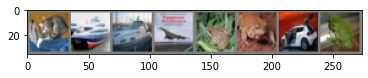

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog


In [73]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

Pytorch Implementacion

In [76]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = mlp(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 35 %


In [77]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = mlp(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 22.9 %
Accuracy for class car   is: 49.8 %
Accuracy for class bird  is: 11.9 %
Accuracy for class cat   is: 13.1 %
Accuracy for class deer  is: 40.9 %
Accuracy for class dog   is: 32.8 %
Accuracy for class frog  is: 57.0 %
Accuracy for class horse is: 48.7 %
Accuracy for class ship  is: 43.7 %
Accuracy for class truck is: 38.9 %


keras


In [63]:
import tensorflow.keras as keras  


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170500096/170498071 [==============================] - 4s 0us/step


In [37]:
print((y_train.shape))

(50000, 1)


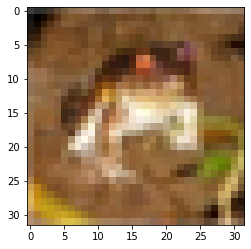

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [54]:
X_train = x_train.astype('float32') 
X_test = x_test.astype('float32') 
X_train = x_train / 255.0 
X_test = x_test / 255.0

In [84]:
X_train =X_train.reshape(-1,3072)

In [53]:
# one hot encode outputs 
y_train2 = np_utils.to_categorical(y_train) 
y_test2 = np_utils.to_categorical(y_test) 
num_classes = y_test2.shape[1]

In [48]:
#one hot encoding
from keras.utils import np_utils
Y_train=y_train.reshape(-1,50000)
print(Y_train.shape)
#Y_train=np_utils.to_categorical(Y_train)
Y_test=y_test.reshape(-1,10000)
#Y_test=np_utils.to_categorical(Y_test)
num_class=Y_test.shape[1]

(1, 50000)


In [79]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=[32,32,3]))

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(num_class, activation='softmax'))

In [80]:
# Compile model 
epochs = 100
lrate = 0.01 
decay = lrate/epochs 
sgd = keras.optimizers.SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_18 (Dense)             (None, 84)                43092     
_________________________________________________________________
dense_19 (Dense)             (None, 10000)             850000    
Total params: 2,466,468
Trainable params: 2,466,468
Non-trainable params: 0
_________________________________________________________________


In [85]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32) 

Epoch 1/100


ValueError: ignored

In [16]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


In [ ]:
y_pred = model.predict_classes(X_new)
